<a href="https://colab.research.google.com/github/e-done/math-1009/blob/main/rigidMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Modules

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
from random import choice
from random import seed
from string import ascii_uppercase

# Define Functions

In [ ]:
def translate(x,y,v) :
  return x+v[0], y+v[1]

def reflect(x,y,m) :
  xhat = np.array([x,y]).T
  matrix = np.array([[1-m**2, 2*m],[2*m, m**2 -1]])
  matrix = matrix * (1/(1+m**2))
  R = matrix.dot(xhat)
  return R[0],R[1]

def glide_reflect(x,y,v,m) :
  x1, y1 = translate(x,y,v)
  x2, y2 = reflect(x1,y1,m)
  return x2, y2

def rotate(x,y,angle) :
  qx = np.cos(angle) * x - np.sin(angle) * y
  qy = np.sin(angle) * x + np.cos(angle) * y
  return qx, qy

def collinear(P) :
  x1, y1 = P[1][0] - P[0][0], P[1][1] - P[0][1]
  x2, y2 = P[2][0] - P[0][0], P[2][1] - P[0][1]
  return abs(x1 * y2 - x2 * y1) < 1e-12

def mkPlot(id, transformation, problem, grid) :

  if id == None :
    id = randint(1.,1000.)
    flag = 0
    print('id = ',id)
  else :
    flag = randint(1.,1000.)
    print('Set id to None to not display solution.')

  seed(id)
  debug = True

  if transformation == 'random' :
    transformation = choice(['reflect', 'translate', 'glide reflect', 'rotate'])

  if problem == 'random' :
    problem = choice(['forward', 'backward'])

  if flag != 0 :
    problem = 'solution'

  if grid == 'random' :
    grid = choice(['square', 'triangle'])

  if debug :
    print('id =',id)
    print('flag =',flag)
    print('transformation =',transformation)
    print('problem =',problem)
    print('grid =',grid)

  fig, ax = plt.subplots(figsize=(10,10))
  if grid == 'square' :
    plt.grid(True)
  else :
    plt.grid(False)

  # angle of rotation
  if grid == 'square' :
    seed(id+1)
    angle = choice([90., 180., -90.])
  else :
    seed(id+1)
    angle = choice([60., 120., 180., -60., -120.])
  if angle > 0.:
    tit = f'{int(angle)} degrees counter-clockwise'
  else :
    tit = f'{-int(angle)} degrees clockwise'
  if debug :
    print('angle =',angle)
  angle *= np.pi/180.

  # slope of reflection line
  if grid == 'square' :
    seed(id+2)
    rise = choice([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
    run = choice([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
    m = rise/run
  else : # triangle
    seed(id+2)
    m = np.tan(angle)
    L = choice([-3, -2, -1, 1, 2, 3])
    rise = m*L
    run = L
  if debug :
    print('rise =',rise)
    print('run =',run)

  # vector of translation
  v = np.array([run, rise])
  if debug :
    print('v =',v)

  # shape points
  N = 3
  X = [0. for i in range(N)]
  Y = [0. for i in range(N)]
  while collinear(list(zip(X,Y))) :
    X = []
    Y = []
    for i in range(N) :
      if grid == 'square' :
        seed(id+3+i)
        # offset from origin a multiple of the slope
        # (so shape points are on grid points)
        offset = randint(-3,3)
        xl = run*offset
        yl = rise*offset
        # offset from line point a multiple of the orthogonal slope
        # (so shape and transform points are on grid points)
        offset = randint(-3,3)
        while offset == 0 :
          offset = randint(-3,3)
        X.append(xl+offset*rise)
        Y.append(yl-offset*run)
      else : # triangle grid
        seed(id+3+i)
        ix = randint(-10,10)
        iy = randint(-10,10)
        while ix==0 and iy==0 :
          ix = randint(-10,10)
          iy = randint(-10,10)
        if np.mod(ix,2) :
          # ix is odd, want iy to be odd so land on a vertex in the triangular grid
          if not np.mod(iy,2) :
            # iy is even, make it odd
            iy += choice([-1,1])
        else :
          # ix is even, want iy to be even so land on a vertex in the triangular grid
          if np.mod(iy,2) :
            # iy is odd, make it even
            iy += choice([-1,1])
        # convert to x,y coordinates
        X.append(ix*0.5)
        Y.append(iy*np.sqrt(3.)/2.)

  # plot shape points
  for i in range(N) :
    plt.scatter(X[i],Y[i],c='orange')
    ax.annotate(f'{ascii_uppercase[i]}', (X[i], Y[i]), size=20, xytext=(X[i]+0.1, Y[i]+0.1))

  # image points
  Xp = []
  Yp = []
  r = [np.Inf, -np.Inf, np.Inf, -np.Inf]
  for i in range(N):

    x = X[i]
    y = Y[i]
    if transformation == 'translate' :
      xp, yp = translate(x,y,v)
    elif transformation == 'reflect' :
      xp, yp = reflect(x,y,m)
    elif transformation == 'glide reflect' :
      xp, yp = glide_reflect(x,y,v,m)
    elif transformation == 'rotate' :
      xp, yp = rotate(x,y,angle)
    Xp.append(xp)
    Yp.append(yp)

    if problem == 'solution' or problem == 'backward' :
      # plot image points
      plt.scatter(xp,yp,c='purple')
      ax.annotate(f"{ascii_uppercase[i]}'", (xp, yp), size=20, xytext=(xp+0.1, yp+0.1))

    if np.min([x,xp]) < r[0] :
      r[0] = int(np.min([x,xp]))
    if np.max([x,xp]) > r[1] :
      r[1] = int(np.max([x,xp]))
    if np.min([y,yp]) < r[2] :
      r[2] = int(np.min([y,yp]))
    if np.max([y,yp]) > r[3] :
      r[3] = int(np.max([y,yp]))
  if debug :
    print('r =',r)

  # plot original shape
  plt.fill(X,Y,facecolor='lightsalmon', edgecolor='orangered', linewidth=2, label='Original')

  # plot transformed image
  if problem == 'solution' or problem == 'backward' :
    plt.fill(Xp,Yp,facecolor='none', edgecolor='purple', linewidth=2, label='Transformed')

  # plot origin of rotation
  if transformation == 'rotate' and (problem == 'solution' or problem == 'forward') :
    plt.scatter(0.,0.,c='black')
    ax.annotate('O', (0.,0.), size=25, xytext=(0.1, 0.1))

  # plot line of reflection
  if (transformation == 'reflect' or transformation == 'glide reflect') and (problem == 'solution' or problem == 'forward') :
    X_LINE = np.arange(-25, 25, 0.1)
    Y_LINE = m*X_LINE
    plt.plot(X_LINE, Y_LINE, color='g', linewidth=2, linestyle='dashed')

  # plot vector of translation
  if (transformation == 'translate' or transformation == 'glide reflect') and (problem == 'solution' or problem == 'forward') :
    if grid == 'square' :
      plt.quiver(2., 2., v[0], v[1], color=['g'], angles='xy', scale_units='xy', scale=1)
    else : # triangle
      plt.quiver(3., np.sqrt(3.), v[0], v[1], color=['g'], angles='xy', scale_units='xy', scale=1)

  # plot legend
  if problem == 'solution' or problem == 'backward' :
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

  # write title
  if (problem == 'solution' or problem == 'forward') and (transformation == 'rotate') :
    plt.title(tit)

  # format axis
  xmin = r[0]-3
  xmax = r[1]+3
  ymin = r[2]-3
  ymax = r[3]+3
  if transformation == 'translate' or transformation == 'glide reflect' :
    # also account for arrow size
    if grid == 'square' :
      left = min(2,2+v[0]-3)
      right = max(2,2+v[0]+3)
      top = max(2,2+v[1]+3)
      bottom = min(2,2+v[1]-3)
    else : # triangle
      left = min(3,3+v[0]-3)
      right = max(3,3+v[0]+3)
      top = max(np.sqrt(3),np.sqrt(3)+v[1]+3)
      bottom = min(np.sqrt(3),np.sqrt(3)+v[1]-3)
    xmin = min(xmin, left)
    xmax = max(xmax, right)
    ymin = min(ymin, bottom)
    ymax = max(ymax, top)
  ax.set_xlim([xmin, xmax])
  ax.set_ylim([ymin, ymax])
  if grid == 'square' :
    ax.set_xticks(list(range(xmin,xmax+1)))
    ax.set_yticks(list(range(ymin,ymax+1)))
  else : # triangle
    x = np.linspace(xmin,xmax)
    # horizontal lines
    dy = np.sqrt(3.)/2.
    m = 0.
    for b in np.linspace(-25.*dy,25.*dy,num=51,endpoint=True) :
      y = m*x + b
      plt.plot(x,y,color='gray',linewidth=0.5)
    # diagonal lines (+)
    dy = np.sqrt(3.)
    m = np.sqrt(3.)
    for b in np.linspace(-25.*dy,25.*dy,num=51,endpoint=True) :
      y = m*x + b
      plt.plot(x,y,color='gray',linewidth=0.5)
    # diagonal lines (-)
    dy = np.sqrt(3.)
    m = -np.sqrt(3.)
    for b in np.linspace(-25.*dy,25.*dy,num=51,endpoint=True) :
      y = m*x + b
      plt.plot(x,y,color='gray',linewidth=0.5)
  plt.xticks(color='w')
  plt.yticks(color='w')
  plt.axis([xmin, xmax, ymin, ymax])
  plt.gcf().set_size_inches(10,10*( ymax-ymin )/( xmax-xmin ))

  # save png
  #plt.savefig(f'handout/{transformation}_{problem}_{grid}_{id}.png')
  plt.show()

# Generate Example

Set id to None to not display solution.


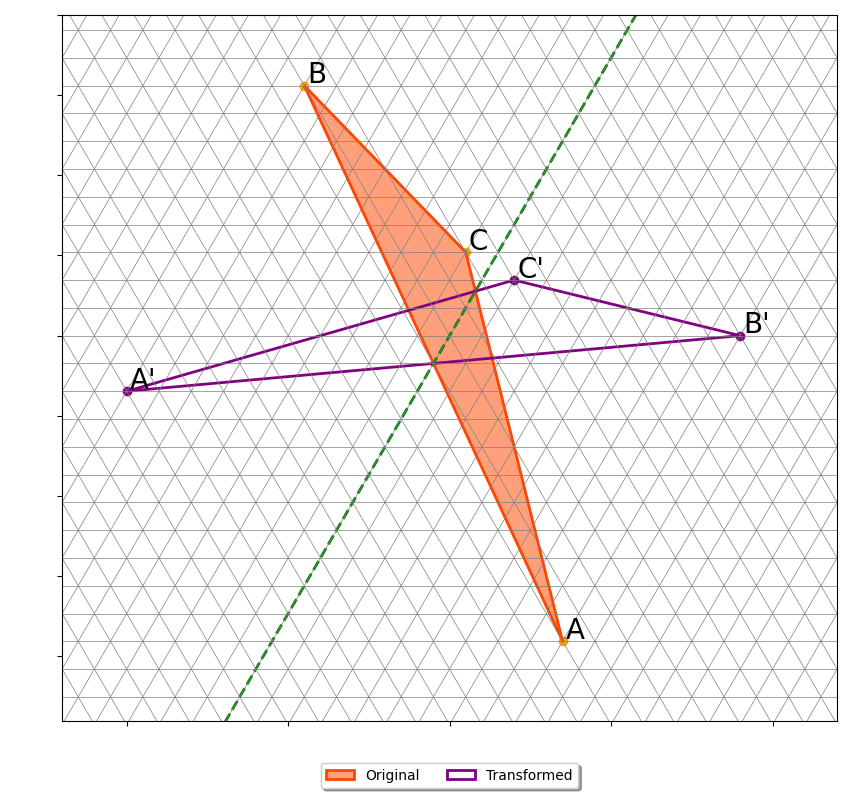

In [ ]:
################################################################################

id = None # random seed

transformation = 'random'
               # 'reflect', 'translate', 'glide reflect', 'rotate', 'random'

problem = 'random'
        # 'forward', 'backward', 'random'

grid = 'random'
     # 'square', 'triangle', 'random'

################################################################################

mkPlot(id, transformation, problem, grid)
